# 1. 영어 Word2Vec 만들기

In [1]:
import nltk
nltk.download('punkt')

import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


> **1) 훈련 데이터 이해하기**   
> xml 문법으로 작성된 파일

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml",
                           filename='ted_en-20160408.xml')

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x1f6f404dfa0>)

> **2) 훈련 데이터 전처리하기**

In [3]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# <content>와 </content> 사이 내용 분리
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# (Audio), (Laughter)같은 배경음 제거
content_text = re.sub(r'\([^)]*\)', '', parse_text)

sent_text = sent_tokenize(content_text)

normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)
    
result = [word_tokenize(sentence) for sentence in normalized_text]

In [4]:
print('총 샘플 개수: {}'.format(len(result)))

총 샘플 개수: 273424


In [5]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


> **3) Word2Vec 훈련시키기**   

In [6]:
from gensim.models import Word2Vec
# 인자로 임베딩된 워드 벡터 차원, window 크기, 최소 빈도수, 학습할 프로세스 수, Word2Vec 종류 설정
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

In [7]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8550910353660583), ('guy', 0.8068154454231262), ('boy', 0.7719100713729858), ('lady', 0.7712609767913818), ('girl', 0.763562798500061), ('gentleman', 0.7406904697418213), ('kid', 0.7245045900344849), ('soldier', 0.7054559588432312), ('poet', 0.6878600120544434), ('rabbi', 0.667716383934021)]


> **4) Word2Vec 모델 저장하고 로드하기**

In [8]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v")

In [9]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8550910353660583), ('guy', 0.8068154454231262), ('boy', 0.7719100713729858), ('lady', 0.7712609767913818), ('girl', 0.763562798500061), ('gentleman', 0.7406904697418213), ('kid', 0.7245045900344849), ('soldier', 0.7054559588432312), ('poet', 0.6878600120544434), ('rabbi', 0.667716383934021)]


# 2. 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt",
                           filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x1f6b6a11580>)

In [12]:
train_data = pd.read_table('ratings.txt')
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [13]:
print(len(train_data))

200000


In [14]:
print(train_data.isnull().values.any())

True


In [15]:
train_data = train_data.dropna(how = 'any')
print(train_data.isnull().values.any())

False


In [16]:
print(len(train_data))

199992


In [17]:
# 정규 표현식으로 한글만 남김
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
train_data[:5]

<ipython-input-17-90ed13fbefbe>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")


,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1


In [18]:
# 불용어 정의
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [19]:
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰 최대 길이:  68
리뷰 평균 길이:  10.669446777871116


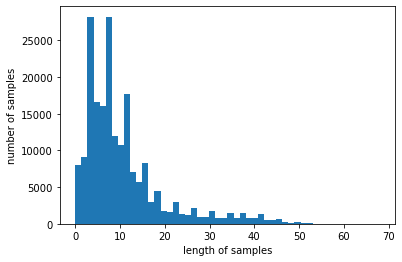

In [20]:
print('리뷰 최대 길이: ', max(len(l) for l in tokenized_data))
print('리뷰 평균 길이: ', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)

model.wv.vectors.shape

(17947, 100)

In [22]:
print(model.wv.most_similar("최민식"))

[('김창완', 0.8818182349205017), ('김명민', 0.8696763515472412), ('신들리다', 0.8687861561775208), ('서영희', 0.865473747253418), ('한석규', 0.8623051643371582), ('이정재', 0.8598620295524597), ('안성기', 0.8506191372871399), ('김수현', 0.8472611904144287), ('애플렉', 0.8472286462783813), ('유오성', 0.8454292416572571)]


In [23]:
print(model.wv.most_similar("히어로"))

[('무협', 0.8791438341140747), ('느와르', 0.8712635040283203), ('호러', 0.8481535911560059), ('블록버스터', 0.8366760015487671), ('슬래셔', 0.8357245326042175), ('홍콩', 0.829791247844696), ('정통', 0.8220496773719788), ('물의', 0.8206202387809753), ('무비', 0.8177585601806641), ('물', 0.8157922029495239)]


# 3. 사전 훈련된 Word2Vec 임베딩 소개

> **1) 영어**   
> 구글은 사전 훈련된 3백만 개의 Word2Vec 단어 벡터 제공

In [24]:
import gensim
# model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)

In [25]:
# print(model.vectors.shape)

In [26]:
# print(model.similarity('this', 'is'))
# print(model.similarity('post', 'book'))

In [27]:
# print(model['book'])

> **2) 한국어**   
박규병님이 학습된 한국어 Word2Vec 모델 제공

In [28]:
import gensim
model = gensim.models.Word2Vec.load('./ko.bin')

In [29]:
result = model.wv.most_similar('강아지')
print(result)

[('고양이', 0.7290453314781189), ('거위', 0.7185634970664978), ('토끼', 0.7056223750114441), ('멧돼지', 0.6950401067733765), ('엄마', 0.693433403968811), ('난쟁이', 0.6806551218032837), ('한마리', 0.6770296096801758), ('아가씨', 0.675035297870636), ('아빠', 0.6729634404182434), ('목걸이', 0.6512461304664612)]
